# Configurando o ambiente

Usei a integtração SQL com o Jupyter Notebook para rodar as queries do exercício de forma interativa e mais fácil de acompanhar. Usei a linguagem `PL/pgSQL` do banco de dados PostgreSQL porque o site da Oracle não me permitiu logar por alguma razão.

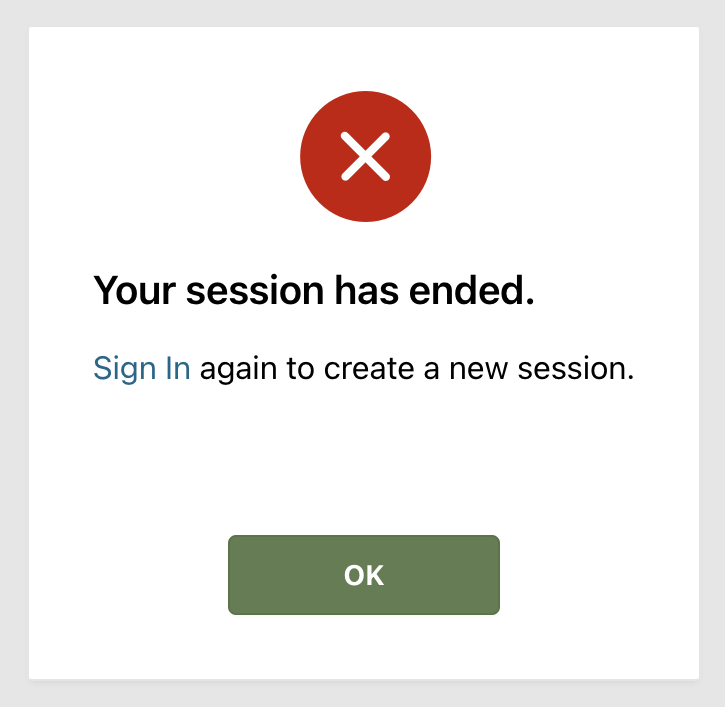


In [1]:
%load_ext sql

In [3]:
%sql --section db-aula-07

Connecting and switching to connection db-aula-07

# Criando as tabelas

In [6]:
%%sql

create table Instituto (
Cod_instituto integer,
Nome_Instituto varchar(30),
Primary key(Cod_instituto));

 

create table Curso (
Cod_curso integer,
Nome_Curso varchar(30),
Cod_Instituto integer,
Primary key(Cod_curso),
Foreign key (Cod_instituto) References Instituto (Cod_instituto));

 

create table Disciplina (
Cod_Disciplina integer,
Nome_Disciplina varchar(30),
Cod_Curso integer,
Primary key(Cod_Disciplina),
Foreign key (Cod_curso) References Curso (Cod_curso));

 

create table Professor (
Cod_Professor integer,
Nome_Professor varchar(30),
Salario integer,
Primary key(Cod_Professor));

 

create table Aluno (
Matricula integer,
Nome_Aluno varchar(30),
Bairro varchar(30),
Idade integer,
Cod_curso integer,
Cod_Professor_Orientador integer,
Primary key(Matricula),
Foreign key (Cod_curso) References Curso (Cod_curso),
Foreign key (Cod_Professor_Orientador) References Professor(Cod_Professor));

 

create table Aluno_Disc (
Matricula integer,
Cod_Disciplina integer,
Nota integer,
Primary key(Matricula,Cod_Disciplina),
Foreign key (Matricula) References Aluno (Matricula),
Foreign key (Cod_Disciplina) References Disciplina (Cod_Disciplina));

 

create table Prof_Disc (
Cod_Professor integer,
Cod_Disciplina integer,
Dia_Semana varchar(10),
ala integer,
Primary key(Cod_Professor,Cod_Disciplina),
Foreign key (Cod_Professor) References Professor(Cod_Professor),
Foreign key (Cod_Disciplina) References Disciplina (Cod_Disciplina));

 

-- Insercao de dados nas tabelas criadas anteriormente

 

insert into Instituto values (1, 'Ciencias Exatas');
insert into Instituto values (2, 'Ciencias Humanas');
insert into Instituto values (3, 'Ciencias Biologicas');

 

insert into Curso values (1001, 'Ciencia da Computacao', 1);
insert into Curso values (1002, 'Administracao de Empresas', 2);

 

insert into Disciplina values (2001, 'Banco de Dados I', 1001);
insert into Disciplina values (2002, 'Engenharia de Software I', 1001);
insert into Disciplina values (2003, 'Banco de Dados II', 1001);
insert into Disciplina values (2004, 'Interface Homem-Maquina', 1001);
insert into Disciplina values (2005, 'Engenharia de Software II', 1001);

 

insert into Professor values (3001, 'Camila', 1500);
insert into Professor values (3002, 'Joao', 3000);
insert into Professor values (3003, 'Ana', 3000);
insert into Professor values (3004, 'Pedro', 2500);

 

insert into Aluno values (1, 'Claudia', 'Vila Mariana', 20, 1001, 3001);
insert into Aluno values (2, 'Andrea', 'Lapa', 24, 1001, 3002);
insert into Aluno values (3, 'Regiane', 'Penha', 22, 1001, 3004);
insert into Aluno values (4, 'Rodrigo', 'Sumare', 20, 1002, 3001);
insert into Aluno values (5, 'Renata', 'Vila Mariana', 22, 1002, 3004);

 

insert into Aluno_Disc values (1, 2001,8);
insert into Aluno_Disc values (1, 2002,7);
insert into Aluno_Disc values (4, 2003,6);
insert into Aluno_Disc values (4, 2004,10);
insert into Aluno_Disc values (4, 2005,8);

 

insert into Prof_Disc values (3001, 2001, 'Segunda', 201);
insert into Prof_Disc values (3002, 2002, 'Quarta', 104);
insert into Prof_Disc values (3001, 2003, 'Sexta', 105);
insert into Prof_Disc values (3004, 2004, 'Terca', 106);
insert into Prof_Disc values (3002, 2005, 'Quarta', 110);

Running query in 'db-aula-07'

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

++
||
++
++

# Exercícios

1) Implemente um bloco PL/SQL que aumente o salário da professora ‘Camila’, obedecendo às seguintes regras:
    - se ela orienta mais de um aluno, o aumento será de 10%;
    - senão, ela não terá aumento e deverá mostrar na tela ‘Não teve aumento, pois não orientou mais de um aluno’.

In [10]:
%%sql

DO $$ 
DECLARE
    nome_prof text := 'Camila';
    num_alunos integer := 0;
BEGIN
    -- Verifique se a professora Camila orienta mais de um aluno.
    SELECT COUNT(*) INTO num_alunos
    FROM aluno al
    LEFT JOIN professor prof ON prof.cod_professor = al.cod_professor_orientador
    WHERE nome_professor = nome_prof;

    IF num_alunos > 1 THEN
        -- Aumento de 10% para professora que orienta mais de um aluno.
        UPDATE professor
        SET salario = salario * 1.1
        WHERE nome_professor = nome_prof;
        RAISE NOTICE 'Salário da professora % aumentado em 10%%', nome_prof;
    ELSE
        RAISE NOTICE 'Não teve aumento, pois não orientou mais de um aluno';
    END IF;
END $$;

Running query in 'db-aula-07'

++
||
++
++

2) Crie uma procedure que insira um aluno (já existente no banco de dados) em uma disciplina (também já existente no banco de dados). Ou seja, o objetivo é inserir uma nova linha na tabela Aluno_Disc. Serão passados os seguintes argumentos:
    - nome do aluno e nome da disciplina (já existentes no banco de dados) e, também, a nota que o aluno teve nesta disciplina;
    - caso o aluno e/ou a disciplina não existam no banco de dados, mostre uma mensagem dizendo que o aluno e/ou disciplina não existe(m) no banco de dados.
 

Depois da procedure criada, utilize-a para inserir a aluna 'Regiane' na disciplina de 'Banco de Dados II' com nota igual a 8.

In [11]:
%%sql

CREATE OR REPLACE PROCEDURE inserir_aluno_disciplina (
    nome_al text,
    nome_disc text,
    n numeric
) AS $$
DECLARE
    mat integer;
    cd integer;
BEGIN
    -- Verificar se o aluno existe no banco de dados.
    IF NOT EXISTS (SELECT 1 FROM aluno WHERE nome_aluno = nome_al) THEN
        RAISE EXCEPTION 'O aluno % não existe no banco de dados.', nome_al;
    END IF;

    -- Verificar se a disciplina existe no banco de dados.
    IF NOT EXISTS (SELECT 1 FROM disciplina WHERE nome_disciplina = nome_disc) THEN
        RAISE EXCEPTION 'A disciplina % não existe no banco de dados.', nome_disc;
    END IF;

    SELECT matricula INTO mat FROM aluno WHERE nome_aluno = nome_al;
    SELECT cod_disciplina INTO cd FROM disciplina WHERE nome_disciplina = nome_disc;

    -- Inserir o aluno na disciplina.
    INSERT INTO aluno_disc (matricula, cod_disciplina, nota)
    VALUES (
        (SELECT matricula FROM aluno WHERE nome_aluno = nome_al),
        (SELECT cod_disciplina FROM disciplina WHERE nome_disciplina = nome_disc),
        n
    );
    
    COMMIT;
    RAISE NOTICE 'Aluno % inserido na disciplina % com nota %.', nome_al, nome_disc, n;
END;
$$ LANGUAGE plpgsql;

Running query in 'db-aula-07'

++
||
++
++

In [ ]:
%%sql

CALL inserir_aluno_disciplina('Regiane', 'Banco de Dados II', 8);

In [17]:
%%sql

SELECT nome_aluno, nota
FROM aluno_disc
LEFT JOIN aluno on aluno.matricula = aluno_disc.matricula
LEFT JOIN disciplina on disciplina.cod_disciplina = aluno_disc.cod_disciplina
WHERE nome_aluno = 'Regiane' AND nome_disciplina = 'Banco de Dados II'

Running query in 'db-aula-07'

1 rows affected.

nome_aluno,nota
Regiane,8


3) Crie uma function que retorne a quantidade de disciplinas que um aluno já cursou. A função receberá como argumento o nome do aluno (já existente no banco de dados).

 

Depois da function criada, faça um SELECT na tabela Dual para saber quantas disciplinas o aluno 'Rodrigo' já cursou.

In [19]:
%%sql

CREATE OR REPLACE FUNCTION quantidade_disciplinas_cursadas(aluno_nome text)
RETURNS integer AS $$
DECLARE
    aluno_id integer;
    disciplinas_cursadas integer;
BEGIN
    -- Busca a matricula do aluno
    SELECT matricula INTO aluno_id FROM aluno WHERE nome_aluno = aluno_nome;

    -- Conta a quantidade de disciplinas cursadas
    SELECT COUNT(*) INTO disciplinas_cursadas
    FROM aluno_disc
    WHERE matricula = aluno_id;

    RETURN disciplinas_cursadas;
END;
$$ LANGUAGE plpgsql;

Running query in 'db-aula-07'

++
||
++
++

In [21]:
%%sql

SELECT quantidade_disciplinas_cursadas('Rodrigo') AS disciplinas_cursadas;

Running query in 'db-aula-07'

1 rows affected.

disciplinas_cursadas
3


4) Crie um trigger que é disparado quando a nota de um aluno em uma disciplina for atualizada. Se isso acontecer, o trigger deverá inserir uma nova linha na tabela `Historico_Notas` (que você deverá criar agora) com a matrícula do aluno, o nome dele, a nota antes da atualização, a nota atual (após a atualização) e a data em que foi feita esta atualização no banco de dados.

In [26]:
%%sql

CREATE TABLE Historico_Notas (
    id serial PRIMARY KEY,
    matricula integer,
    nome_aluno text,
    cod_disciplina integer,
    nome_disciplina text,
    nota_anterior numeric,
    nota_atual numeric,
    data_atualizacao timestamp
);

Running query in 'db-aula-07'

++
||
++
++

In [37]:
%%sql 

CREATE OR REPLACE FUNCTION nota_atualizada_trigger()
RETURNS TRIGGER AS $$
DECLARE
    aluno_matricula integer;
    aluno_nome text;
BEGIN
    -- Insere um registro no histórico de notas.
    INSERT INTO Historico_Notas (
        matricula,
        nome_aluno,
        cod_disciplina,
        nome_disciplina,
        nota_anterior,
        nota_atual,
        data_atualizacao)
    VALUES (
        NEW.matricula,
        (SELECT a.nome_aluno FROM aluno a WHERE a.matricula = NEW.matricula),
        NEW.cod_disciplina,
        (SELECT disc.nome_disciplina FROM disciplina disc WHERE disc.cod_disciplina = NEW.cod_disciplina),
        OLD.nota,
        NEW.nota,
        now());

    RETURN NEW;
END;
$$ LANGUAGE plpgsql;

-- Cria o trigger que dispara a função acima quando a nota é atualizada.
CREATE TRIGGER nota_atualizada
AFTER UPDATE ON aluno_disc
FOR EACH ROW
EXECUTE FUNCTION nota_atualizada_trigger();


Running query in 'db-aula-07'

++
||
++
++

In [39]:
%%sql

UPDATE aluno_disc
SET nota = 6
WHERE matricula = 3 AND cod_disciplina = 2003;

UPDATE aluno_disc
SET nota = 7
WHERE matricula = 1 AND cod_disciplina = 2001;

Running query in 'db-aula-07'

1 rows affected.

1 rows affected.

++
||
++
++

In [40]:
%%sql

select * from historico_notas

Running query in 'db-aula-07'

3 rows affected.

id,matricula,nome_aluno,cod_disciplina,nome_disciplina,nota_anterior,nota_atual,data_atualizacao
1,3,Regiane,2003,Banco de Dados II,8,7,2023-10-21 02:30:07.948081
2,3,Regiane,2003,Banco de Dados II,7,6,2023-10-21 02:31:03.153136
3,1,Claudia,2001,Banco de Dados I,8,7,2023-10-21 02:31:03.178102
